In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from plot import plot_martingale_paths
# from utils import *

import bisect

In [7]:
n_seeds = 100
methods = ['fixed_cal_dyn', 'none']
alarm_var_names = ['martingale_alarm', 'PR_ST_alarm','SR_alarm', 'PR_CD_alarm']
dd_var_names = ['martingale_dd', 'PR_ST_dd','SR_dd', 'PR_CD_dd']

index_var_names = ['itrial', 'methods']
runtime_var_names = ['martingale_runtime','SR_runtime', 'PR_ST_runtime', 'PR_CD_runtime']
num_test_unshifted = 100

bike_sharing_alarm_results = pd.read_csv(f'../results/2025-01-28_Alarms_bike_sharing-NN-label-c_bias1.0-label1.5-win50-csabs-nseeds100-Wfixed_cal_dyn_none-numTUn100-test0Size0.33333-initCalFalse-schboth-pHold0.75_v4-batch1.csv')
bike_sharing_alarm_results_minibatch = pd.read_csv(f'../results/2025-01-29_Alarms_bike_sharing-NN-label-c_bias1.0-label1.25-win50-csabs-nseeds100-Wfixed_cal_dyn_none-numTUn100-test0Size0.33333-initCalFalse-schboth-pHold0.75_SR_CDsConbetting-tConbetting-eTol0.0-sDel5e-05-tDel5e-05-stopfirst_alarm-batch50v4.csv')
superconduct_alarm_results = pd.read_csv(f'../results/2025-01-28_Alarms_superconduct-NN-label-c_bias1.0-label5.0-win50-csabs-nseeds100-Wfixed_cal_dyn_none-numTUn100-test0Size0.33333-initCalFalse-schboth-pHold0.75-batch1_v4.csv')
superconduct_alarm_results_minibatch = pd.read_csv(f'../results/2025-01-28_Alarms_superconduct-NN-label-c_bias1.0-label5.0-win50-csabs-nseeds100-Wfixed_cal_dyn_none-numTUn100-test0Size0.33333-initCalFalse-schboth-pHold0.75_SR_CDsConbetting-tConbetting-eTol0.0-sDel5e-05-tDel5e-05-stopfirst_alarm-batch50v4.csv') ## Batch
# meps_alarm_results = pd.read_csv(f'../results/2025-01-28_Alarms_meps-NN-label-c_bias1.5-label1.5-win50-csabs-nseeds100-Wfixed_cal_dyn_none-numTUn200-test0Size0.33333-initCalFalse-schboth-pHold0.75-batch1_v4.csv')
# meps_alarm_results = pd.read_csv(f'../results/2025-01-28_Alarms_meps-NN-label-c_bias1.5-label1.5-win50-csabs-nseeds50-Wfixed_cal_dyn_none-numTUn100-test0Size0.33333-initCalFalse-schboth-pHold0.75_SR_CDsConbetting-tConbetting-eTol0.0-sDel5e-05-tDel5e-05-stopfirst_alarm-batch1v4.csv')
# meps_alarm_results = pd.read_csv(f'../results/2025-01-28_Alarms_meps-NN-label-c_bias1.5-label1.5-win50-csabs-nseeds100-Wfixed_cal_dyn_none-numTUn200-test0Size0.33333-initCalFalse-schboth-pHold0.75-batch1_v4.csv')
meps_alarm_results = pd.read_csv(f'../results/2025-01-28_Alarms_meps-NN-label-c_bias1.5-label1.5-win50-csabs-nseeds100-Wfixed_cal_dyn_none-numTUn100-test0Size0.33333-initCalFalse-schboth-pHold0.75-batch1_v4.csv')
meps_alarm_results_minibatch = pd.read_csv(f'../results/2025-01-28_Alarms_meps-NN-label-c_bias1.5-label1.5-win50-csabs-nseeds100-Wfixed_cal_dyn_none-numTUn100-test0Size0.33333-initCalFalse-schboth-pHold0.75-batch50_v4.csv') ## batch version

print("check bike_sharing seeds : ", max(bike_sharing_alarm_results['itrial']))

print("check superconduct seeds : ", max(superconduct_alarm_results['itrial']))

print("check meps seeds         : ", max(meps_alarm_results['itrial']))

for dataset_name in ['bike_sharing','superconduct', 'meps']: # 'bike_sharing', 
    print(dataset_name)
    alarm_results = eval(dataset_name+'_alarm_results')    
    alarm_detection_delays = alarm_results[index_var_names]
    alarm_detection_delays.loc[:,alarm_var_names] = alarm_results.loc[:,alarm_var_names] - num_test_unshifted
    alarm_detection_delays.loc[:,runtime_var_names] = alarm_results[runtime_var_names]
    alarm_detection_delays.columns = np.concatenate((index_var_names, dd_var_names, runtime_var_names))
    
    ##Add minibatch results
    alarm_results_minibatch = eval(dataset_name+'_alarm_results_minibatch')    
    alarm_detection_delays['PR_CD_minibatch50_dd'] = alarm_results_minibatch['PR_CD_alarm'] - num_test_unshifted
    alarm_detection_delays['PR_CD_minibatch50_runtime'] = alarm_results_minibatch['PR_CD_runtime']

    dd_means = alarm_detection_delays.groupby('methods').mean()
    print(dataset_name+'_dd_means')
    display(dd_means)

    dd_stderrs = (alarm_detection_delays.groupby('methods').std()) / np.sqrt(n_seeds)
    print(dataset_name+'dd_stderrs')
    display(dd_stderrs)

check bike_sharing seeds :  99
check superconduct seeds :  99
check meps seeds         :  99
bike_sharing
bike_sharing_dd_means


/tmp/ipykernel_2178922/1220329926.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alarm_detection_delays.loc[:,alarm_var_names] = alarm_results.loc[:,alarm_var_names] - num_test_unshifted
/tmp/ipykernel_2178922/1220329926.py:30: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  alarm_detection_delays.loc[:,alarm_var_names] = alarm_results.loc[:,alarm_var_names] - num_test_unshifted
/tmp/ipykernel_2178922/1220329926.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

,itrial,martingale_dd,PR_ST_dd,SR_dd,PR_CD_dd,martingale_runtime,SR_runtime,PR_ST_runtime,PR_CD_runtime,PR_CD_minibatch50_dd,PR_CD_minibatch50_runtime
methods,,,,,,,,,,,
fixed_cal_dyn,49.5,182.59,685.29,145.09,162.71,0.004094,0.006250,0.083028,0.792019,2840.578947,0.953160
none,49.5,183.01,686.61,146.50,163.53,0.004210,0.006331,0.078843,0.775492,2149.000000,0.476083


bike_sharingdd_stderrs


,itrial,martingale_dd,PR_ST_dd,SR_dd,PR_CD_dd,martingale_runtime,SR_runtime,PR_ST_runtime,PR_CD_runtime,PR_CD_minibatch50_dd,PR_CD_minibatch50_runtime
methods,,,,,,,,,,,
fixed_cal_dyn,2.901149,11.792097,56.419041,7.121742,9.219548,0.00017,0.000388,0.014798,0.097604,163.340547,0.107106
none,2.901149,11.815830,52.279420,7.395583,8.705362,0.00018,0.000408,0.013145,0.091974,131.931032,0.075040


superconduct
superconduct_dd_means


/tmp/ipykernel_2178922/1220329926.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alarm_detection_delays.loc[:,alarm_var_names] = alarm_results.loc[:,alarm_var_names] - num_test_unshifted
/tmp/ipykernel_2178922/1220329926.py:30: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  alarm_detection_delays.loc[:,alarm_var_names] = alarm_results.loc[:,alarm_var_names] - num_test_unshifted
/tmp/ipykernel_2178922/1220329926.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

,itrial,martingale_dd,PR_ST_dd,SR_dd,PR_CD_dd,martingale_runtime,SR_runtime,PR_ST_runtime,PR_CD_runtime,PR_CD_minibatch50_dd,PR_CD_minibatch50_runtime
methods,,,,,,,,,,,
fixed_cal_dyn,49.5,176.33,985.35,149.68,224.27,0.004918,0.007949,0.235220,2.283659,441.5,0.005310
none,49.5,173.85,887.26,149.43,217.47,0.004856,0.007879,0.178243,2.072688,438.5,0.005343


superconductdd_stderrs


,itrial,martingale_dd,PR_ST_dd,SR_dd,PR_CD_dd,martingale_runtime,SR_runtime,PR_ST_runtime,PR_CD_runtime,PR_CD_minibatch50_dd,PR_CD_minibatch50_runtime
methods,,,,,,,,,,,
fixed_cal_dyn,2.901149,8.449231,69.496259,7.129380,10.889721,0.000144,0.000493,0.034014,0.229380,18.040009,0.00050
none,2.901149,8.067060,52.821131,6.963052,10.055356,0.000138,0.000467,0.021613,0.194639,18.698768,0.00052


meps
meps_dd_means


/tmp/ipykernel_2178922/1220329926.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alarm_detection_delays.loc[:,alarm_var_names] = alarm_results.loc[:,alarm_var_names] - num_test_unshifted
/tmp/ipykernel_2178922/1220329926.py:30: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  alarm_detection_delays.loc[:,alarm_var_names] = alarm_results.loc[:,alarm_var_names] - num_test_unshifted
/tmp/ipykernel_2178922/1220329926.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

,itrial,martingale_dd,PR_ST_dd,SR_dd,PR_CD_dd,martingale_runtime,SR_runtime,PR_ST_runtime,PR_CD_runtime,PR_CD_minibatch50_dd,PR_CD_minibatch50_runtime
methods,,,,,,,,,,,
fixed_cal_dyn,49.5,120.74,513.79,103.79,107.05,0.003971,0.005193,0.069333,0.558173,196.5,0.001704
none,49.5,120.59,479.51,103.59,107.98,0.003947,0.005173,0.060427,0.557977,191.5,0.001675


mepsdd_stderrs


,itrial,martingale_dd,PR_ST_dd,SR_dd,PR_CD_dd,martingale_runtime,SR_runtime,PR_ST_runtime,PR_CD_runtime,PR_CD_minibatch50_dd,PR_CD_minibatch50_runtime
methods,,,,,,,,,,,
fixed_cal_dyn,2.901149,5.274364,32.118566,4.313762,5.763108,0.000090,0.000225,0.007587,0.054793,8.449942,0.000071
none,2.901149,5.242139,28.384836,4.321828,5.603516,0.000089,0.000225,0.006365,0.052032,8.449942,0.000067


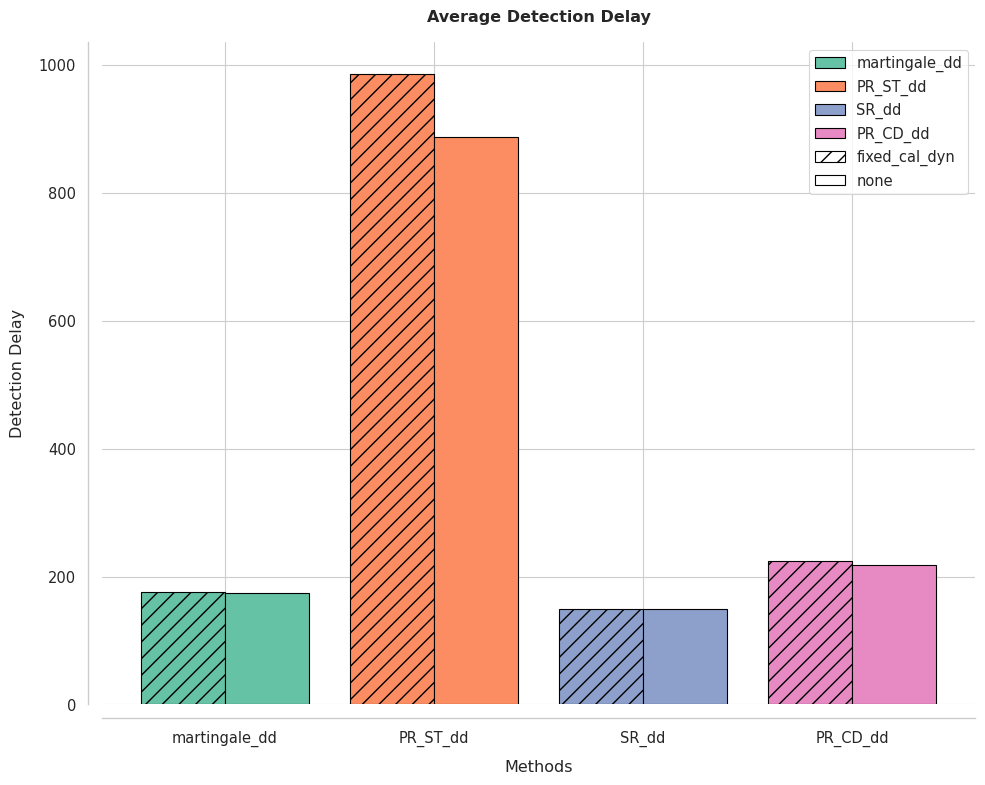

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns

def plot_detection_delays():
    # --------------------
    # Prepare the data
    # --------------------
    methods = ["martingale_dd", "PR_ST_dd", "SR_dd", "PR_CD_dd"]
    fixed_cal_dyn = [176.33, 985.35, 149.68, 224.27]
    none_ =        [173.85, 887.26, 149.43, 217.47]

    # --------------------
    # Plot configuration
    # --------------------
    # Set a nice academic style
    sns.set_theme(context='paper', style='whitegrid', font='DejaVu Sans', font_scale=1.2)

    # Figure size (width=10, height=8)
    fig, ax = plt.subplots(figsize=(10, 8))

    # You can choose a custom palette. For four groups, let's pick something soft but distinct.
    colors = sns.color_palette("Set2", n_colors=4)

    # The x positions of the group labels
    x = np.arange(len(methods))
    width = 0.4  # width of each bar

    # --------------------
    # Draw the bars
    # --------------------
    for i, method in enumerate(methods):
        ax.bar(
            x[i] - width / 2,
            fixed_cal_dyn[i],
            width=width,
            color=colors[i],
            edgecolor='black',
            hatch='//',           # cross-hatch for fixed_cal_dyn
        )
        ax.bar(
            x[i] + width / 2,
            none_[i],
            width=width,
            color=colors[i],
            edgecolor='black',
        )

    # --------------------
    # Axis labels and title
    # --------------------
    ax.set_xticks(x)
    ax.set_xticklabels(methods, rotation=0)
    ax.set_ylabel("Detection Delay", labelpad=10)
    ax.set_xlabel("Methods", labelpad=10)
    ax.set_title("Average Detection Delay", pad=15, weight='bold')

    # --------------------
    # Create the legend
    # --------------------
    # Legend for the 4 method groups (color)
    group_color_handles = [
        Patch(facecolor=colors[i], edgecolor='black', label=methods[i])
        for i in range(len(methods))
    ]
    # Legend for the 2 bar types (hatch vs. plain)
    bar_type_handles = [
        Patch(facecolor='white', edgecolor='black', hatch='//', label='fixed_cal_dyn'),
        Patch(facecolor='white', edgecolor='black', label='none')
    ]

    # Combine into a single legend:
    # method colors first, then bar types
    legend_handles = group_color_handles + bar_type_handles

    # Place legend in upper right corner
    ax.legend(handles=legend_handles, loc='upper right', frameon=True)

    # Remove extra spines for a cleaner look
    sns.despine(ax=ax, offset=10)

    # Adjust spacing
    plt.tight_layout()

    plt.show()

# Call the function
plot_detection_delays()

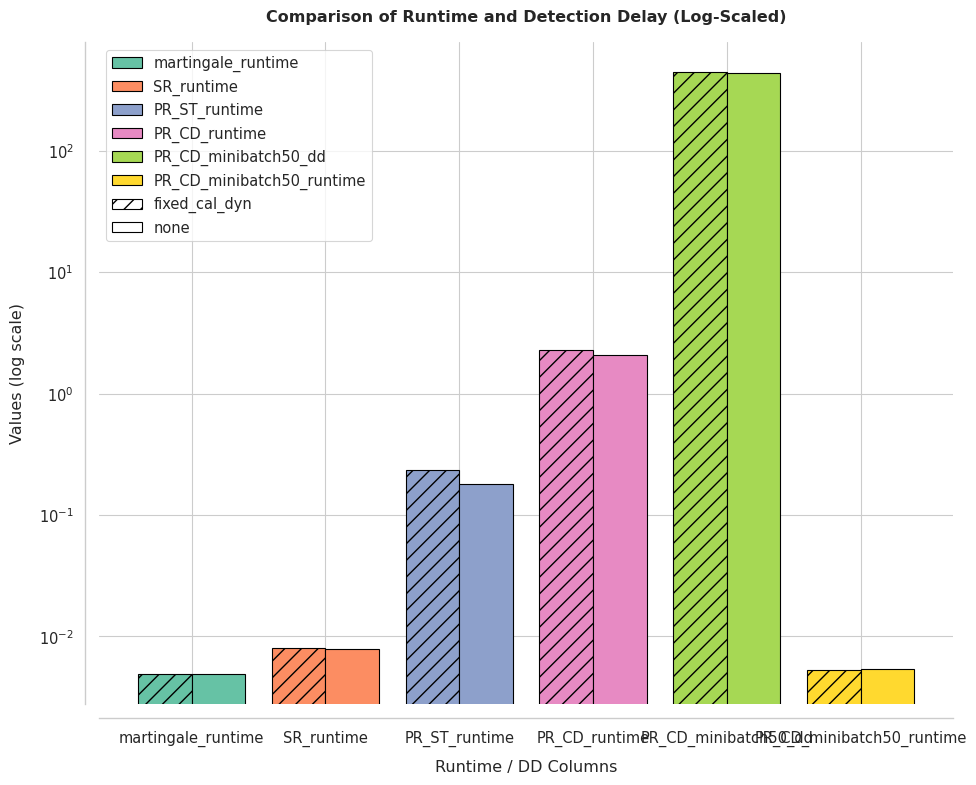

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns

def plot_runtime_logscale():
    # ------------------------------------------------
    # 1) Prepare your data from the table
    # ------------------------------------------------
    columns = [
        "martingale_runtime", 
        "SR_runtime", 
        "PR_ST_runtime", 
        "PR_CD_runtime",
        "PR_CD_minibatch50_dd",
        "PR_CD_minibatch50_runtime"
    ]
    
    fixed_cal_dyn = [
        0.004918,   # martingale_runtime
        0.007949,   # SR_runtime
        0.23522,    # PR_ST_runtime
        2.283659,   # PR_CD_runtime
        441.5,      # PR_CD_minibatch50_dd
        0.00531     # PR_CD_minibatch50_runtime
    ]
    
    none_ = [
        0.004856,   # martingale_runtime
        0.007879,   # SR_runtime
        0.178243,   # PR_ST_runtime
        2.072688,   # PR_CD_runtime
        438.5,      # PR_CD_minibatch50_dd
        0.005343    # PR_CD_minibatch50_runtime
    ]

    # ------------------------------------------------
    # 2) Configure plotting style
    # ------------------------------------------------
    sns.set_theme(context='paper', style='whitegrid', font='DejaVu Sans', font_scale=1.2)
    
    fig, ax = plt.subplots(figsize=(10, 8))

    # One color for each column group
    colors = sns.color_palette("Set2", n_colors=len(columns))

    x = np.arange(len(columns))
    width = 0.4

    # ------------------------------------------------
    # 3) Draw grouped bars
    # ------------------------------------------------
    for i, col_name in enumerate(columns):
        # fixed_cal_dyn bar (hatched)
        ax.bar(
            x[i] - width/2,
            fixed_cal_dyn[i],
            width=width,
            color=colors[i],
            edgecolor='black',
            hatch='//',  
        )
        # none bar (plain fill)
        ax.bar(
            x[i] + width/2,
            none_[i],
            width=width,
            color=colors[i],
            edgecolor='black',
        )

    # ------------------------------------------------
    # 4) Aesthetics: log scale, labels, legend
    # ------------------------------------------------
    ax.set_yscale('log')

    ax.set_xticks(x)
    ax.set_xticklabels(columns, rotation=15, ha='right')
    
    ax.set_ylabel("Values (log scale)", labelpad=10)
    ax.set_xlabel("Runtime / DD Columns", labelpad=10)
    ax.set_title("Comparison of Runtime and Detection Delay (Log-Scaled)", pad=15, weight='bold')

    # Prepare legend handles
    group_color_handles = [
        Patch(facecolor=colors[i], edgecolor='black', label=columns[i])
        for i in range(len(columns))
    ]
    bar_type_handles = [
        Patch(facecolor='white', edgecolor='black', hatch='//', label='fixed_cal_dyn'),
        Patch(facecolor='white', edgecolor='black', label='none')
    ]

    legend_handles = group_color_handles + bar_type_handles

    # Place the legend in the top-left corner of the plot
    ax.legend(handles=legend_handles, loc='upper left')

    sns.despine(ax=ax, offset=10)
    plt.tight_layout()
    plt.show()

# Call the function to generate the plot
plot_runtime_logscale()